# Imports y setup del entorno

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import sys

sys.path.append('../lib')

import ml_lib_apo as ml



# Carga del dataset intermedio

In [2]:
ds = pd.read_csv('../dataset/dataset_wisconsin.csv')

# Generar pipeline para entrenamiento

In [3]:
scaler = ('minmax_scaler', MinMaxScaler())

pipeline_numerico = Pipeline(steps=[scaler])

preprocessor = ColumnTransformer (transformers=[
    ('numeric_pipe', pipeline_numerico, ds.drop('Diagnóstico', axis=1).columns)
])

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   texture_mean         569 non-null    float64
 1   perimeter_mean       569 non-null    float64
 2   smoothness_mean      569 non-null    float64
 3   compactness_mean     569 non-null    float64
 4   concavity_mean       569 non-null    float64
 5   concave points_mean  569 non-null    float64
 6   symmetry_mean        569 non-null    float64
 7   Diagnóstico          569 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 35.7 KB


# Modelos de referencia

## Data Split


In [5]:
X = ds.drop('Diagnóstico', axis=1)
y = ds['Diagnóstico']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Dummy model

### Aleatorio Uniforme

Accuracy = 0.5212765957446809
Precision = 0.3763440860215054
Recall = 0.5223880597014925
F1 = 0.5223880597014925


DummyClassifier(strategy='uniform')

<Figure size 1080x720 with 0 Axes>

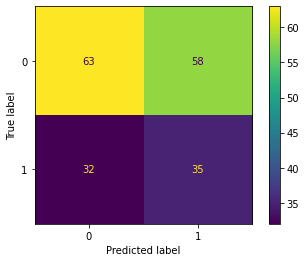

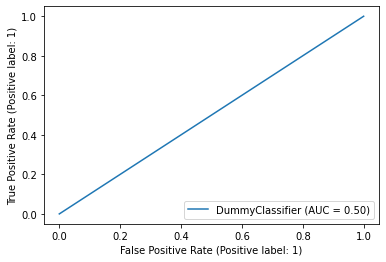

In [6]:
dummy = DummyClassifier(strategy='uniform')
ml.evaluar_modelo(dummy, X_train, y_train, X_test, y_test)

### Valor mas frecuente

Accuracy = 0.6436170212765957
Precision = 1.0
Recall = 0.0
F1 = 0.0


DummyClassifier(strategy='most_frequent')

<Figure size 1080x720 with 0 Axes>

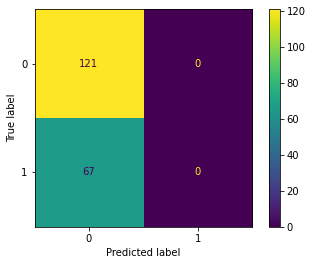

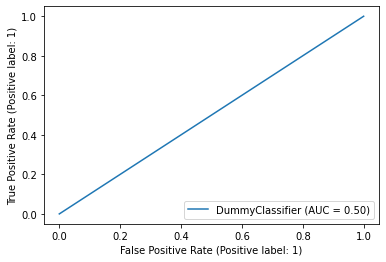

In [7]:
dummy = DummyClassifier(strategy='most_frequent')
ml.evaluar_modelo(dummy, X_train, y_train, X_test, y_test)

# Selección de modelo

## Regresión logística

In [16]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=100000, random_state = 0
    ))
])

Accuracy = 0.925531914893617
Precision = 0.9491525423728814
Recall = 0.835820895522388
F1 = 0.835820895522388


<Figure size 1080x720 with 0 Axes>

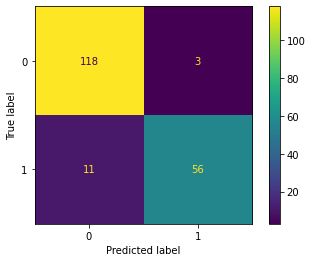

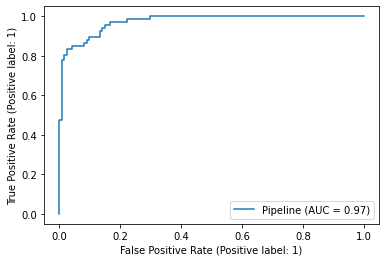

In [17]:
modelo_lr = ml.evaluar_modelo(clf_lr, X_train, y_train, X_test, y_test)

### Hypertuning

In [ ]:
param_grid_lr = [{
    'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : [0.1, 0.01, 1, 10],
    'classifier__solver' : ['saga'],
    'classifier__max_iter' : [100000]
},
    {
    'classifier__penalty' : ['l2', 'none'],
    'classifier__C' : [0.1, 0.01, 1, 10],
    'classifier__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'classifier__max_iter' : [100000]
    },
]
grid_lr = GridSearchCV(clf_lr, param_grid=param_grid_lr, cv=3,
                    scoring=['accuracy', 'precision', 'recall'], refit='recall',
                    n_jobs=-1, verbose=0)

In [ ]:
grid_lr.fit(X,y);

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\s

In [ ]:
ml.presentar_resultados(grid_lr, orden='recall')

*** Mejores resultado *** 
0.901140174379611
*** Mejores parámetros *** 
{'classifier__C': 0.1, 'classifier__max_iter': 100000, 'classifier__penalty': 'none', 'classifier__solver': 'saga'}


,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
23,0.873239,0.887324,0.942857,0.90114,0.030054,1
45,0.873239,0.887324,0.942857,0.90114,0.030054,1
44,0.873239,0.887324,0.942857,0.90114,0.030054,1
39,0.873239,0.887324,0.942857,0.90114,0.030054,1
38,0.873239,0.887324,0.942857,0.90114,0.030054,1


### Evaluación Final

Accuracy = 0.9414893617021277
Precision = 0.9516129032258065
Recall = 0.8805970149253731
F1 = 0.8805970149253731


c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


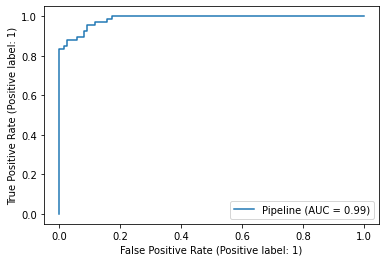

In [ ]:
clf_lr.set_params(**grid_lr.best_params_)
modelo_lr = ml.evaluar_modelo(modelo=clf_lr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_matrix=False);

## Random Forest

In [18]:
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

Accuracy = 0.9202127659574468
Precision = 0.8939393939393939
Recall = 0.8805970149253731
F1 = 0.8805970149253731


<Figure size 1080x720 with 0 Axes>

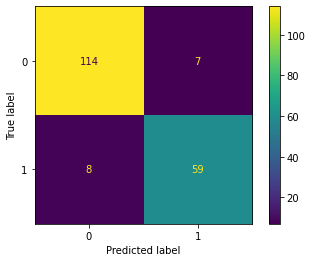

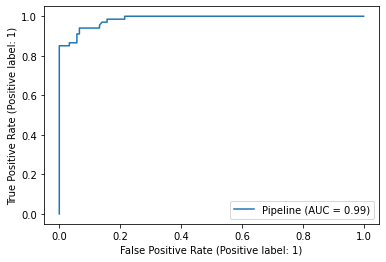

In [19]:
modelo_rf = ml.evaluar_modelo(clf_rf, X_train, y_train, X_test, y_test)

### Hypertuning

In [20]:
param_grid_rf = [{
    'classifier__n_estimators' : [10, 20, 50, 100, 200],
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [None,5, 6 ,8, 10],
    'classifier__min_samples_split' : [2, 3, 4, 5],
    'classifier__bootstrap' : [False, True],
}
]
grid_rf = GridSearchCV(clf_rf, param_grid=param_grid_rf, cv=3,
                    scoring=['accuracy', 'precision', 'recall'], refit='accuracy',
                    n_jobs=-1, verbose=0)

In [21]:
grid_rf.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric_pipe',
                                                                         Pipeline(steps=[('minmax_scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier__bootstrap': [False, True],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 5, 6, 8, 10],
                 

In [22]:
ml.presentar_resultados(grid_rf, orden='recall')

*** Mejores resultado *** 
0.9508122157244964
*** Mejores parámetros *** 
{'classifier__bootstrap': False, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}


,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
181,0.901408,0.873239,0.971429,0.915359,0.041281,1
91,0.915493,0.873239,0.957143,0.915292,0.034254,2
173,0.901408,0.887324,0.957143,0.915292,0.030147,2
387,0.901408,0.901408,0.942857,0.915225,0.019539,4
178,0.887324,0.873239,0.971429,0.910664,0.043350,5


### Evaluación Final

Accuracy = 0.9414893617021277
Precision = 0.9375
Recall = 0.8955223880597015
F1 = 0.8955223880597015


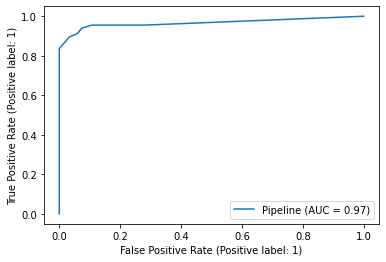

In [23]:
clf_rf.set_params(**grid_rf.best_params_)
modelo_rf = ml.evaluar_modelo(modelo=clf_rf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_matrix=False);

## Red Neuronal

In [27]:
from sklearn.neural_network import MLPClassifier

clf_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(
        max_iter=100000, verbose=0, random_state = 0
    ))
])

Accuracy = 0.9414893617021277
Precision = 0.9516129032258065
Recall = 0.8805970149253731
F1 = 0.8805970149253731


<Figure size 1080x720 with 0 Axes>

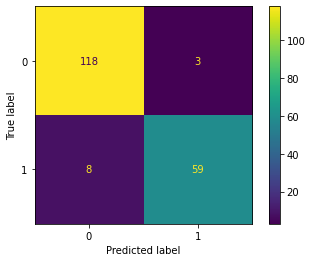

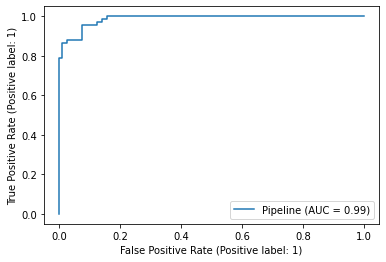

In [28]:
modelo_nn = ml.evaluar_modelo(clf_nn, X_train, y_train, X_test, y_test)

### Hypertuning

In [35]:
param_grid_nn = [{
'classifier__hidden_layer_sizes' : [(20,), (20,20,),(20,10,),(20,10,5,)],
    #'pca__n_components' : [2,3,4,5],
    'classifier__activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'classifier__solver' : ['adam'], #['lbfgs', 'sgd', 'adam']
    'classifier__learning_rate' : ['adaptive'], #['constant', 'invscaling', 'adaptive']
    'classifier__alpha' : [0.1], # 0.01, 0.001, 0.0001], #[0.1, 0.01, 0.001, 0.0001]
    'classifier__batch_size' : [50, 'auto'], #, 50, 300, 500], #['auto', 50, 300, 500]
    'classifier__random_state' : [0]
    },
]
grid_nn = GridSearchCV(clf_nn, param_grid=param_grid_nn, cv=3,
                    scoring=['accuracy', 'precision', 'recall'], refit='recall',
                    n_jobs=-1, verbose=0)

In [36]:
grid_nn.fit(X,y);

In [37]:
ml.presentar_resultados(grid_nn, orden='recall')

*** Mejores resultado *** 
0.9059020791415158
*** Mejores parámetros *** 
{'classifier__activation': 'relu', 'classifier__alpha': 0.1, 'classifier__batch_size': 'auto', 'classifier__hidden_layer_sizes': (20, 10, 5), 'classifier__learning_rate': 'adaptive', 'classifier__random_state': 0, 'classifier__solver': 'adam'}


,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
31,0.887324,0.873239,0.957143,0.905902,0.036686,1
26,0.859155,0.887324,0.957143,0.901207,0.041190,2
30,0.859155,0.887324,0.957143,0.901207,0.041190,2
29,0.859155,0.873239,0.957143,0.896512,0.043256,4
27,0.859155,0.873239,0.957143,0.896512,0.043256,4


### Evaluación Final

Accuracy = 0.9521276595744681
Precision = 0.9393939393939394
Recall = 0.9253731343283582
F1 = 0.9253731343283582


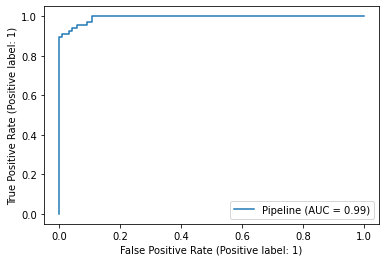

In [38]:
clf_nn.set_params(**grid_nn.best_params_)
modelo_nn = ml.evaluar_modelo(modelo=clf_nn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_matrix=False);

## Support Vector Machines

In [39]:
from sklearn.svm import SVC

clf_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

Accuracy = 0.9414893617021277
Precision = 0.9666666666666667
Recall = 0.8656716417910447
F1 = 0.8656716417910447


<Figure size 1080x720 with 0 Axes>

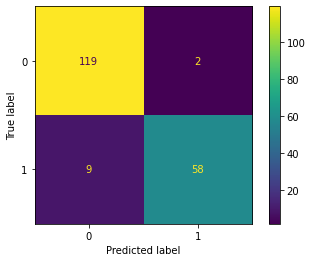

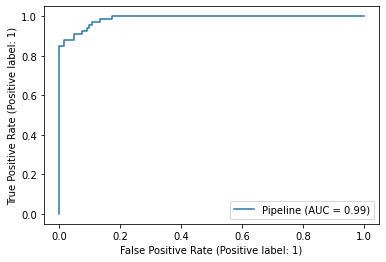

In [40]:
modelo_svm = ml.evaluar_modelo(clf_svm, X_train, y_train, X_test, y_test)

### Hypertuning

In [42]:
param_grid_svm = [{
    #'pca__n_components' : [2,4,6,8],
    'classifier__C' : [0.1,1, 10, 100],
    'classifier__gamma' : [1,0.1,0.01,0.001, 'scale', 'auto'],
    'classifier__kernel' : ['rbf', 'poly', 'sigmoid'],
    'classifier__degree' : [2, 3]
    #'classifier__shrinking' : [True, False],
    #'classifier__decision_function_shape' : ['ovo', 'ovr'],
    #'classifier__break_ties' : [True, False]
}
]
grid_svm = GridSearchCV(clf_svm, param_grid=param_grid_svm, cv=3,
                        scoring=['accuracy', 'precision', 'recall'], refit='accuracy',
                        n_jobs=-1)

In [43]:
grid_svm.fit(X,y);

In [44]:
ml.presentar_resultados(grid_svm, orden='recall')

*** Mejores resultado *** 
0.9525666016894087
*** Mejores parámetros *** 
{'classifier__C': 100, 'classifier__degree': 2, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}


,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
126,0.929577,0.873239,0.971429,0.924748,0.040231,1
108,0.929577,0.873239,0.971429,0.924748,0.040231,1
84,0.915493,0.873239,0.971429,0.920054,0.040215,3
85,0.915493,0.873239,0.971429,0.920054,0.040215,3
102,0.915493,0.873239,0.971429,0.920054,0.040215,3


### Evaluación Final

Accuracy = 0.9627659574468085
Precision = 0.96875
Recall = 0.9253731343283582
F1 = 0.9253731343283582


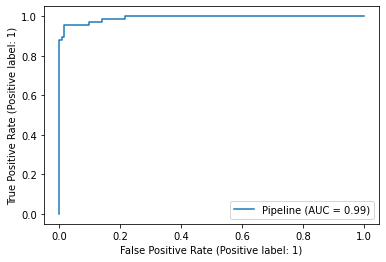

In [45]:
clf_svm.set_params(**grid_svm.best_params_)
modelo_svm = ml.evaluar_modelo(modelo=clf_svm, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_matrix=False);

# Persistir el mejor modelo

In [47]:
from joblib import dump, load
import datetime
now = datetime.datetime.now()
now = now.strftime('%Y.%m.%d-%H.%M')
nombre_archivo = '../modelos/modelo-{0}.joblib'.format(now)
dump(modelo_svm, open(nombre_archivo, 'wb'))
print('{0} escrito'.format(nombre_archivo))

../modelos/modelo-2023.01.04-18.00.joblib escrito
